# Setting up

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import re
from collections import Counter
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

## Import data

In [2]:
df = pd.read_csv('train.csv')

# Data Exploration

## Understand dataset size, identify missing values, remove unneeded columns

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print('shape: ', df.shape)
print()
print('data types:')
print(df.dtypes)

shape:  (891, 12)

data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Get value counts, count of missing values and unique values per column (up to 50). Here I want to quickly identify missing values


In [5]:
print('missing values: ')
display(df.isnull().sum())

for col_name in df.columns:
    print()
    print('Feature: ', col_name)
    print('Value count: ', df[col_name].count())
    print('Nan count: ', df[col_name].isnull().sum())
    print('Uniques (first 50): ', df[col_name].unique()[0:50])
    


missing values: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Feature:  PassengerId
Value count:  891
Nan count:  0
Uniques (first 50):  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]

Feature:  Survived
Value count:  891
Nan count:  0
Uniques (first 50):  [0 1]

Feature:  Pclass
Value count:  891
Nan count:  0
Uniques (first 50):  [3 1 2]

Feature:  Name
Value count:  891
Nan count:  0
Uniques (first 50):  ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D 

Remove columns that will not contribute to the exploration (e.g. "id" columns with no missing values).

In [6]:
df.drop(axis=1, columns=['PassengerId', 'Ticket'], inplace=True)

Verify we have the correct remaining columns

In [7]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

## Feature exploration

In [8]:
# Cool seaborn theme
sns.set_theme()

In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Survived

Survived:  0.38


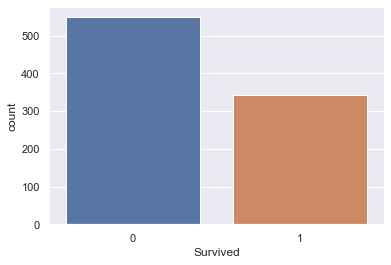

In [10]:
sns.countplot(data = df, x="Survived")
print('Survived: ', "%.2f" % df.Survived.mean())

38% of the passengers survived.

### Passenger Class

<AxesSubplot:xlabel='Pclass', ylabel='count'>

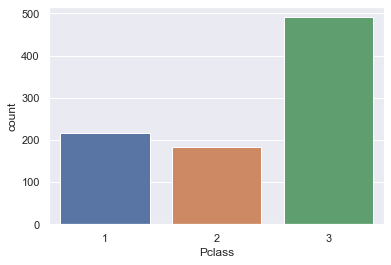

In [11]:
sns.countplot(data=df, x='Pclass')

Most passengers were on the 3rd class

<AxesSubplot:xlabel='Pclass', ylabel='count'>

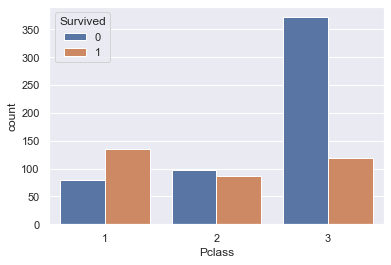

In [12]:
sns.countplot(data=df, x='Pclass', hue='Survived')

Passenger class seems to have predictive power. The majority of 3rd class passengers died. Most of the 1st class passengers survived. Roughly equal number of survivors across classes.

### Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

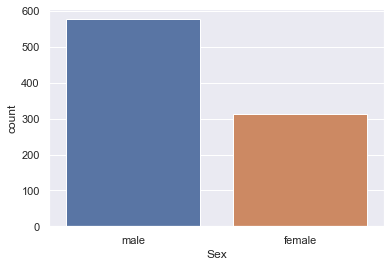

In [13]:
sns.countplot(data=df, x='Sex')

Most of the passengers were male.

<AxesSubplot:xlabel='Sex', ylabel='count'>

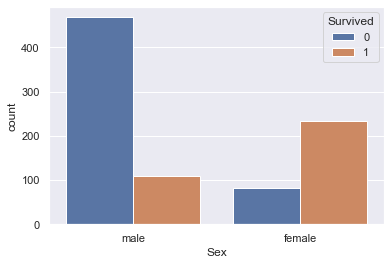

In [14]:
sns.countplot(data=df, x='Sex', hue='Survived')

Strong correlation between sex and survival. Most females survived, while most males died. The majority of survivors were female.

### Age

mean:  29.70
median:  28.00
std:  14.53


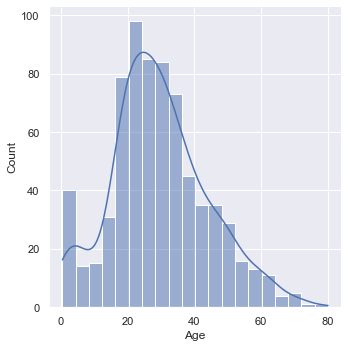

In [15]:
sns.displot(data=df, x="Age", kde=True)
print('mean: ', "%.2f" % df.Age.mean())
print('median: ', "%.2f" % df.Age.median())
print('std: ', "%.2f" % df.Age.std())

<AxesSubplot:xlabel='Age'>

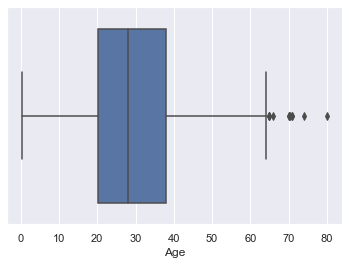

In [16]:
sns.boxplot(data=df, x="Age")

Right skewed age distribution with many newborns. Very few passengers above 60-65.

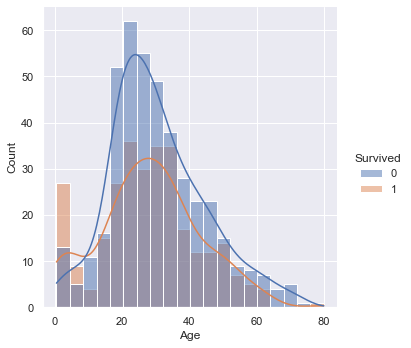

In [17]:
sns.displot(data=df, x="Age", hue="Survived", kde=True)

Age of deceased is roughly normally distributed, slightly right skewed. <5 y.o. is the only age group that had more survivors than deceased. >65 almost no one survived.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

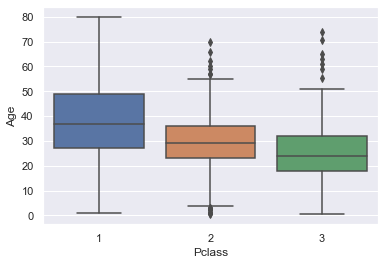

In [18]:
sns.boxplot(data=df, y="Age", x="Pclass")

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

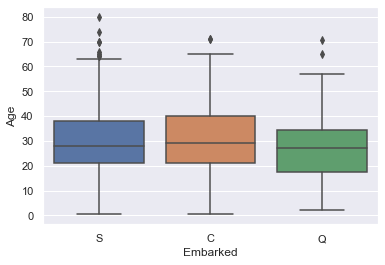

In [19]:
sns.boxplot(data=df, y="Age", x="Embarked")

correlation coef.:  0.10


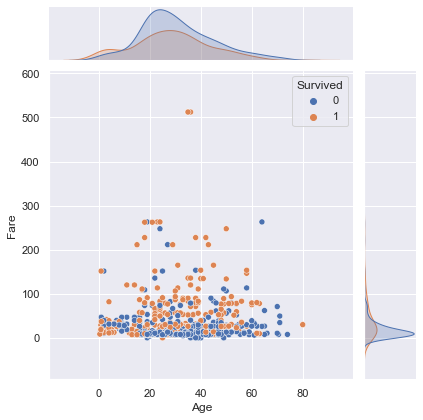

In [20]:
sns.jointplot(data=df, x="Age", y="Fare", hue="Survived")
print('correlation coef.: ', "%.2f" % df.Age.corr(df.Fare))

Age seems to have some correlation with passenger class. 1st class passengers were normally distributed across age and are older on average. 3rd class were younger on average. No differences in the distribution of age for different embark locations. Age and Fare are uncorrelated.

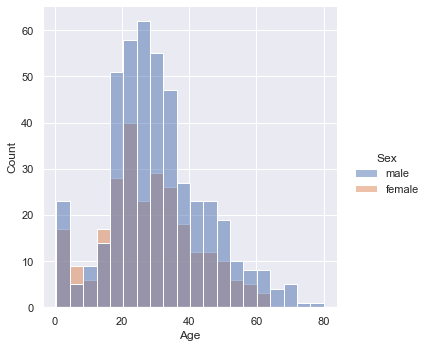

In [21]:
sns.displot(data=df, x="Age", hue="Sex")

<AxesSubplot:xlabel='Age', ylabel='Sex'>

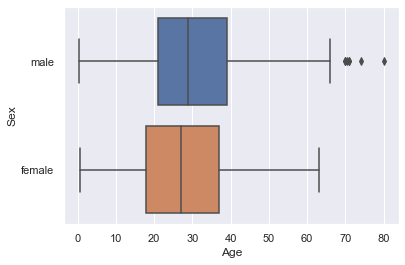

In [22]:
sns.boxplot(data=df, x="Age", y="Sex")

### Siblings/Spouse

<AxesSubplot:xlabel='SibSp', ylabel='count'>

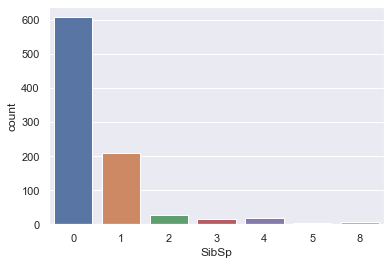

In [23]:
sns.countplot(data=df, x='SibSp')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

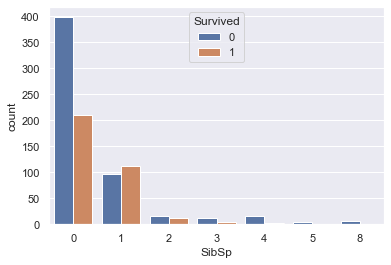

In [24]:
sns.countplot(data=df, x='SibSp', hue='Survived')

In [25]:
xtab1 = pd.crosstab(df.SibSp, df.Survived)
print('chi2 p-value: ', stats.chi2_contingency(xtab1)[1])
print(xtab1)

chi2 p-value:  1.5585810465902147e-06
Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


Passengers with no siblings/spouse were more likely to survive. Couples survived in their majority. The chi square test shows that no. of siblings/spouse and survival are not independent. Small number of observations in the bins for the larger numbers of spouses/siblings, meaning that the result of the test is not reliable.

### Parents & children

Counter({0: 678, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1})

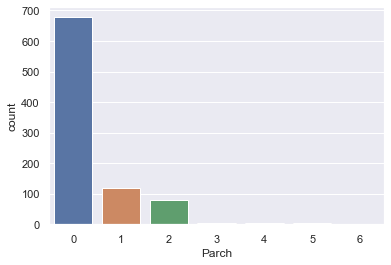

In [26]:
sns.countplot(data=df, x='Parch')
Counter(df.Parch)

<AxesSubplot:xlabel='Parch', ylabel='count'>

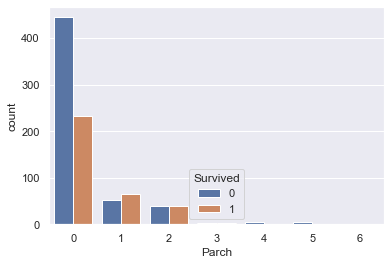

In [27]:
sns.countplot(data=df, x='Parch', hue='Survived')

In [28]:
xtab2 = pd.crosstab(df.Parch, df.Survived)
print('chi2 p-value: ', stats.chi2_contingency(xtab2)[1])
print(xtab2)

chi2 p-value:  9.703526421039997e-05
Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0


The chi square test shows that no. of children/parents and survival are not independent. Small number of observations in the bins for the larger numbers of childen/parents.

In [29]:
xtab3 = pd.crosstab(df.Parch, df.SibSp)
print('chi2 p-value: ', stats.chi2_contingency(xtab3)[1])
print(xtab3)

chi2 p-value:  1.7902298345649077e-51
SibSp    0    1   2  3  4  5  8
Parch                          
0      537  123  16  2  0  0  0
1       38   57   7  7  9  0  0
2       29   19   4  7  9  5  7
3        1    3   1  0  0  0  0
4        1    3   0  0  0  0  0
5        2    3   0  0  0  0  0
6        0    1   0  0  0  0  0


We reject that no. of siblings/spouse and no. of parents/children are independent. Very few or no observations in certain brackets.

### Family size: combining siblings/spouse & parents/children

The 2 variables show very similar distribution and correlation with survival. Let's investigate if we can condense the information into a single variable indicating family size (the sum of the 2 variables).

In [30]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [31]:
df['FamSize'] = df.SibSp + df.Parch

Counter({0: 678, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1})

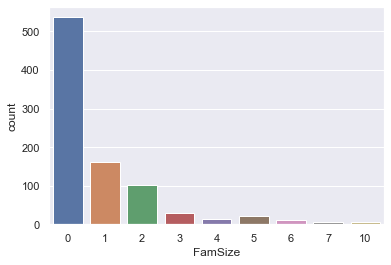

In [32]:
sns.countplot(data=df, x='FamSize')
Counter(df.Parch)

c:\users\yannis\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


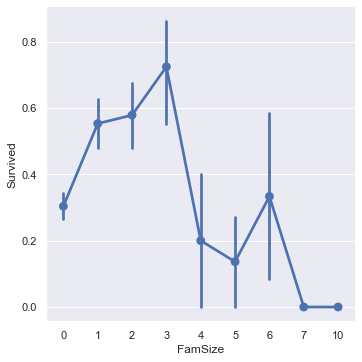

In [33]:
sns.factorplot(data=df, x='FamSize', y='Survived')

Here we see that passengers travelling alone and passengers in family sizes of >4 have much lower survival rate than those travelling in family sizes of 1-3.

In [34]:
df.drop('FamSize', axis=1, inplace=True)

In [35]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### Fare

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

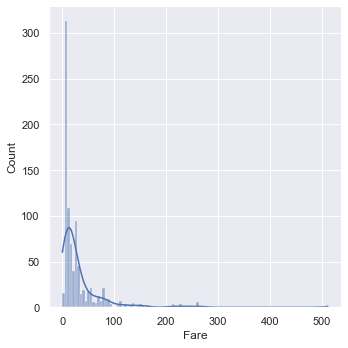

In [36]:
sns.displot(data=df, x="Fare", kde=True)
df.describe()['Fare']

<AxesSubplot:xlabel='Fare'>

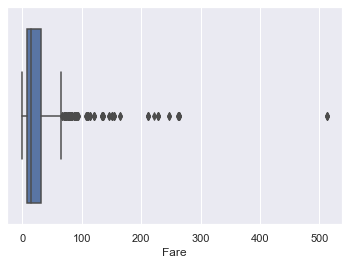

In [37]:
sns.boxplot(data=df, x='Fare')

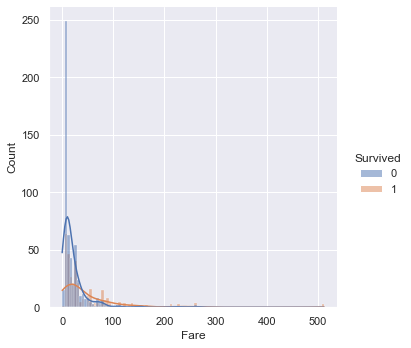

In [38]:
sns.displot(data=df, x="Fare", hue="Survived", kde=True)

Log transform fare for better visualization

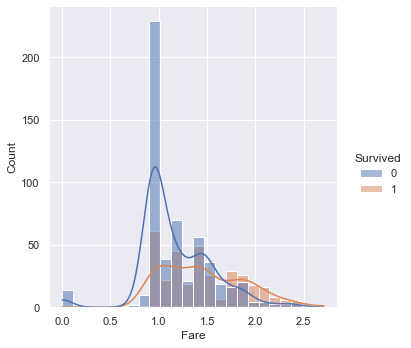

In [39]:
fare = df["Fare"] + 1
logfare = fare.apply(np.log10)
sns.displot(data=df, x=logfare, hue="Survived", kde=True)

The vast majority bought a Fare of close to 0. Extreme outlier at about 500. As seen more clearly from the histogram post log transformation, fare correlates with survival - passengers with more expensive fares survived in greater numbers.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

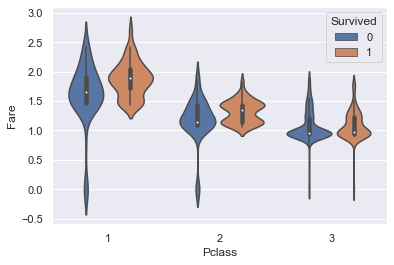

In [40]:
sns.violinplot(data=df, x="Pclass", y=logfare, hue="Survived")

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

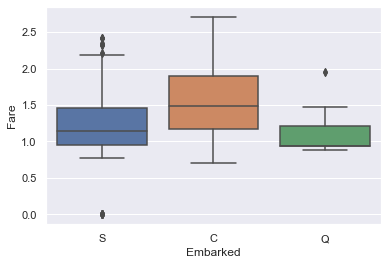

In [41]:
sns.boxplot(data=df, x="Embarked", y=logfare)

Fare correlates with Pclass. Also not independent with embark location - Passengers from Cherbourgh paid higher fares.

### Embark location

<AxesSubplot:xlabel='Embarked', ylabel='count'>

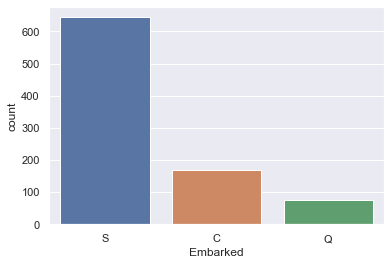

In [42]:
sns.countplot(data=df, x='Embarked')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

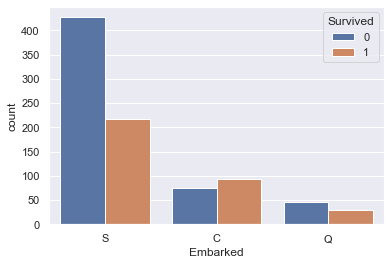

In [43]:
sns.countplot(data=df, x='Embarked', hue = "Survived")

In [44]:
xtab4 = pd.crosstab(df.Embarked, df.Survived)
print('chi2 p-value: ', stats.chi2_contingency(xtab4)[1])
print(xtab4)

chi2 p-value:  1.769922284120912e-06
Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


Dependancy between survival and embark location. Passengers from Cherbourg in their majority survived.

### Name / title

Notice that the name contains the title. We are going to investigate if the title correlates with survival and other features.

In [45]:
df.Name[1]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [46]:
title=[]
for name in df.Name:
    m = re.match(r'^[^,]+, ([^\.]+)\.', name)
    hon = m.groups()[0]
    title.append(hon)

print('Obs. with title: ' , len(title))
Counter(title)

Obs. with title:  891


Counter({'Mr': 517,
         'Mrs': 125,
         'Miss': 182,
         'Master': 40,
         'Don': 1,
         'Rev': 6,
         'Dr': 7,
         'Mme': 1,
         'Ms': 1,
         'Major': 2,
         'Lady': 1,
         'Sir': 1,
         'Mlle': 2,
         'Col': 2,
         'Capt': 1,
         'the Countess': 1,
         'Jonkheer': 1})

Group titles with very low occurences as 'Other'. I will keep 'Dr' and 'Rev', as they could possibly be important.

In [47]:
for i in range(len(title)):
    if title[i] not in ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr']:
        title[i] = 'Other'
        
Counter(title)

Counter({'Mr': 517,
         'Mrs': 125,
         'Miss': 182,
         'Master': 40,
         'Other': 14,
         'Rev': 6,
         'Dr': 7})

<AxesSubplot:xlabel='Title', ylabel='Age'>

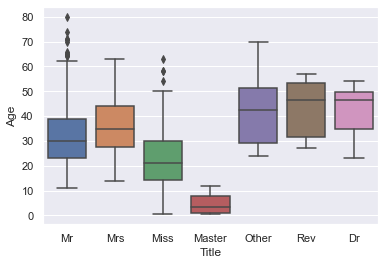

In [48]:
df['Title'] = title
sns.boxplot(data = df, y='Age', x='Title')

<AxesSubplot:xlabel='Title', ylabel='count'>

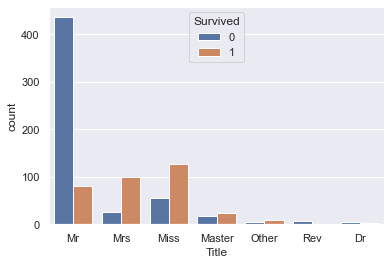

In [49]:
sns.countplot(data=df, x='Title', hue='Survived')

Mr, Mrs, Miss and Master are correlated with age and survival as expected. Rev and Dr are also going to be included in 'Other'. The name column is going to be dropped from further analysis and the title kept instead. Because I want to keep all transformations in one place, I will revert the df here to its original state (i.e. remove the title column).

In [50]:
df['Title'] = df['Title'].replace(['Rev','Dr'],'Other')

<AxesSubplot:xlabel='Title', ylabel='Age'>

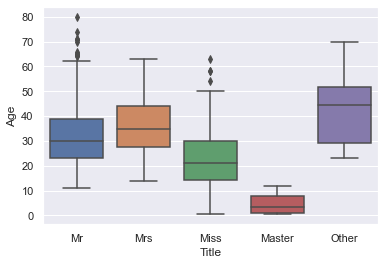

In [51]:
sns.boxplot(data = df, y='Age', x='Title')

In [52]:
df.drop('Title', axis=1, inplace=True)

### Overview / Fancy graph

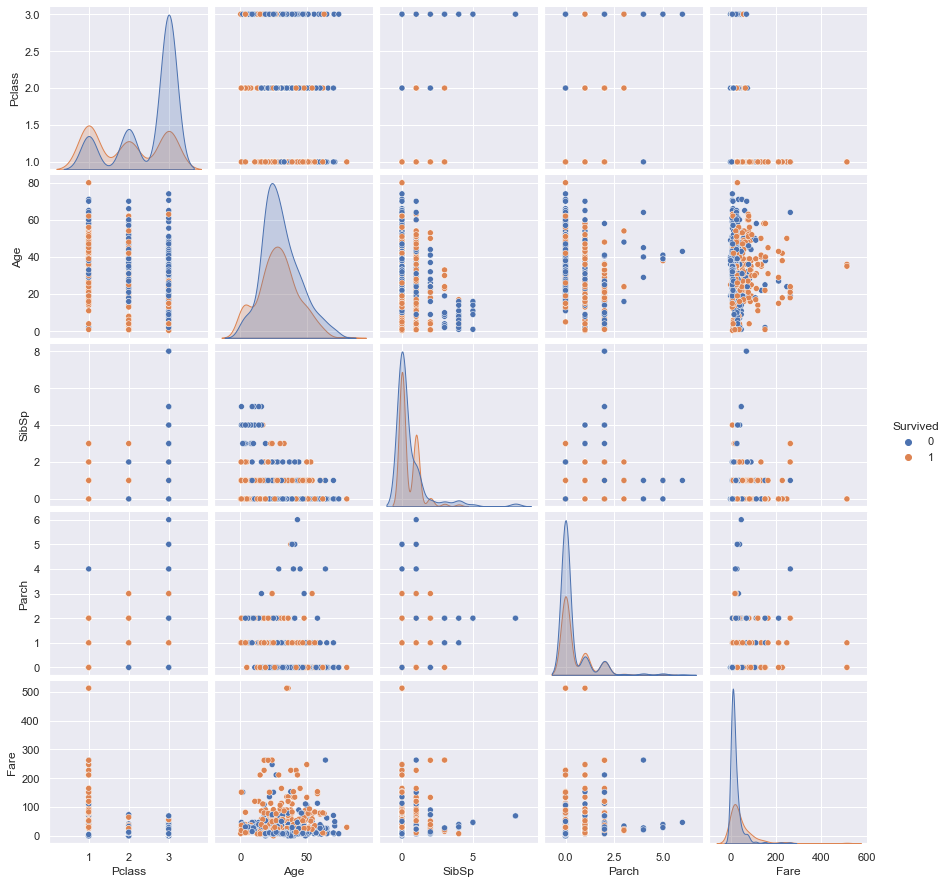

In [53]:
sns.pairplot(data=df, hue='Survived')

## Missing Values

In [54]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [55]:
# Get records with any missing data
null_data = df[df.isnull().any(axis=1)]
print(null_data)

     Survived  Pclass                                      Name     Sex   Age  \
0           0       3                   Braund, Mr. Owen Harris    male  22.0   
2           1       3                    Heikkinen, Miss. Laina  female  26.0   
4           0       3                  Allen, Mr. William Henry    male  35.0   
5           0       3                          Moran, Mr. James    male   NaN   
7           0       3            Palsson, Master. Gosta Leonard    male   2.0   
..        ...     ...                                       ...     ...   ...   
884         0       3                    Sutehall, Mr. Henry Jr    male  25.0   
885         0       3      Rice, Mrs. William (Margaret Norton)  female  39.0   
886         0       2                     Montvila, Rev. Juozas    male  27.0   
888         0       3  Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
890         0       3                       Dooley, Mr. Patrick    male  32.0   

     SibSp  Parch     Fare 

In [56]:
# See if any row is completely missing data
df.isnull().all(axis=1).sum()

0

<AxesSubplot:xlabel='Survived', ylabel='count'>

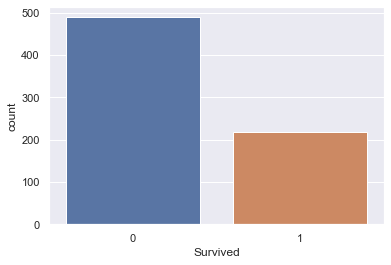

In [57]:
sns.countplot(data = null_data, x="Survived")

In [58]:
df_nan_cabin = df[df.Cabin.isnull()]
print(df_nan_cabin)

     Survived  Pclass                                      Name     Sex   Age  \
0           0       3                   Braund, Mr. Owen Harris    male  22.0   
2           1       3                    Heikkinen, Miss. Laina  female  26.0   
4           0       3                  Allen, Mr. William Henry    male  35.0   
5           0       3                          Moran, Mr. James    male   NaN   
7           0       3            Palsson, Master. Gosta Leonard    male   2.0   
..        ...     ...                                       ...     ...   ...   
884         0       3                    Sutehall, Mr. Henry Jr    male  25.0   
885         0       3      Rice, Mrs. William (Margaret Norton)  female  39.0   
886         0       2                     Montvila, Rev. Juozas    male  27.0   
888         0       3  Johnston, Miss. Catherine Helen "Carrie"  female   NaN   
890         0       3                       Dooley, Mr. Patrick    male  32.0   

     SibSp  Parch     Fare 

In [59]:
df_nan_age = df[df.Age.isnull()]
print(df_nan_age)

     Survived  Pclass                                      Name     Sex  Age  \
5           0       3                          Moran, Mr. James    male  NaN   
17          1       2              Williams, Mr. Charles Eugene    male  NaN   
19          1       3                   Masselmani, Mrs. Fatima  female  NaN   
26          0       3                   Emir, Mr. Farred Chehab    male  NaN   
28          1       3             O'Dwyer, Miss. Ellen "Nellie"  female  NaN   
..        ...     ...                                       ...     ...  ...   
859         0       3                          Razi, Mr. Raihed    male  NaN   
863         0       3         Sage, Miss. Dorothy Edith "Dolly"  female  NaN   
868         0       3               van Melkebeke, Mr. Philemon    male  NaN   
878         0       3                        Laleff, Mr. Kristo    male  NaN   
888         0       3  Johnston, Miss. Catherine Helen "Carrie"  female  NaN   

     SibSp  Parch     Fare Cabin Embark

In [60]:
print('avg. survived in full dataset: ', df.Survived.mean())
print('avg. survived for obs. with missing values: ', null_data.Survived.mean())
print('avg. survived for obs. with missing cabin: ', df_nan_cabin.Survived.mean())
print('avg. survived for obs. with missing age: ', df_nan_age.Survived.mean())

avg. survived in full dataset:  0.3838383838383838
avg. survived for obs. with missing values:  0.3093220338983051
avg. survived for obs. with missing cabin:  0.29985443959243085
avg. survived for obs. with missing age:  0.2937853107344633


Having missing data in cabin or age shows a higher probability that the person did not survive.

<AxesSubplot:xlabel='Sex', ylabel='count'>

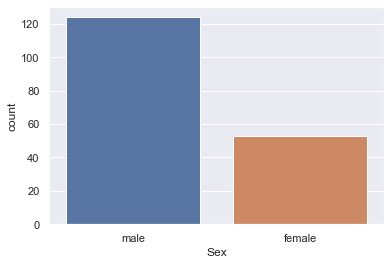

In [61]:
sns.countplot(data=df_nan_age, x='Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

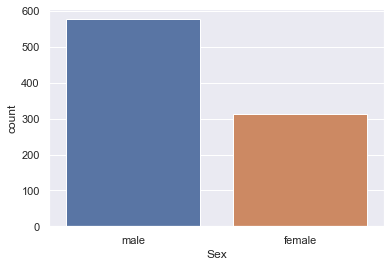

In [62]:
sns.countplot(data=df, x='Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

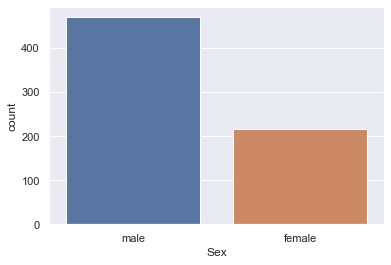

In [63]:
sns.countplot(data=df_nan_cabin, x='Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

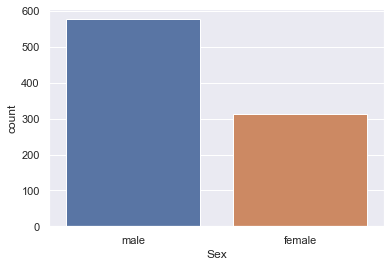

In [64]:
sns.countplot(data=df, x='Sex')

# Data Preprocessing / Transformations

## Recode and Feature extract

In [65]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Drop id columns.

In [66]:
df_train.drop(axis=1, columns=['PassengerId', 'Ticket'], inplace=True)

Create variable FamSize = SibSp + Parch

In [67]:
df_train['FamSize'] = df_train.SibSp + df_train.Parch
df_train.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [68]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamSize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,0


Extract title from name. Get title as a new feature and drop name.

In [69]:
title=[]
for name in df_train.Name:
    m = re.match(r'^[^,]+, ([^\.]+)\.', name)
    hon = m.groups()[0]
    title.append(hon)

for i in range(len(title)):
    if title[i] not in ['Mr', 'Mrs', 'Miss', 'Master']:
        title[i] = 'Other'
        
df_train['Title'] = title
df_train.drop('Name', axis=1, inplace=True)

One-hot encode categorical variables

In [70]:
cat_variables = df_train[['Sex', 'Embarked', 'Title']]
dummies = pd.get_dummies(data=cat_variables, drop_first=True)
df_train = pd.concat([df_train, dummies], axis=1)
df_train = df_train.drop(cat_variables.columns.to_list(), axis=1)
df_train

,Survived,Pclass,Age,Fare,Cabin,FamSize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,22.0,7.2500,NaN,1,1,0,1,0,1,0,0
1,1,1,38.0,71.2833,C85,1,0,0,0,0,0,1,0
2,1,3,26.0,7.9250,NaN,0,0,0,1,1,0,0,0
3,1,1,35.0,53.1000,C123,1,0,0,1,0,0,1,0
4,0,3,35.0,8.0500,NaN,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,NaN,0,1,0,1,0,0,0,1
887,1,1,19.0,30.0000,B42,0,0,0,1,1,0,0,0
888,0,3,NaN,23.4500,NaN,3,0,0,1,1,0,0,0
889,1,1,26.0,30.0000,C148,0,1,0,0,0,1,0,0


## Impute missing values

Drop cabin column and keep the information that the cabin no. is missing in a new column, as it was found that the cabin missing is an indicator that the person did not survive.

In [71]:
df_train['cabin_missing'] = np.where(df_train.Cabin.isnull(), 1, 0)
df_train.drop('Cabin', axis=1, inplace=True)
df_train

,Survived,Pclass,Age,Fare,FamSize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,cabin_missing
0,0,3,22.0,7.2500,1,1,0,1,0,1,0,0,1
1,1,1,38.0,71.2833,1,0,0,0,0,0,1,0,0
2,1,3,26.0,7.9250,0,0,0,1,1,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1,0,0,1,0,0
4,0,3,35.0,8.0500,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0,1,0,1,0,0,0,1,1
887,1,1,19.0,30.0000,0,0,0,1,1,0,0,0,0
888,0,3,NaN,23.4500,3,0,0,1,1,0,0,0,1
889,1,1,26.0,30.0000,0,1,0,0,0,1,0,0,0


<AxesSubplot:xlabel='cabin_missing', ylabel='count'>

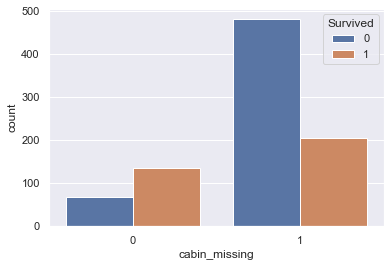

In [72]:
sns.countplot(data=df_train, x="cabin_missing", hue="Survived")


Clearly, missing the cabin shows a much greated likelyhood that the person did not survive

Impute missing values in age and embark with the KNN imputer.

In [73]:
# KNN imputer requires normalized values. 
# Normalize:
normalizer = MinMaxScaler()
df_train = pd.DataFrame(normalizer.fit_transform(df_train), columns = df_train.columns)
# Impute
imputer = KNNImputer(weights='distance', n_neighbors=5)
df_train = pd.DataFrame(imputer.fit_transform(df_train), columns = df_train.columns)
# Inverse transformation
df_train = pd.DataFrame(normalizer.inverse_transform(df_train), columns = df_train.columns)
df_train

,Survived,Pclass,Age,Fare,FamSize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,cabin_missing
0,0.0,3.0,22.000000,7.2500,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.000000,71.2833,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.000000,7.9250,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.000000,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,3.0,35.000000,8.0500,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.000000,13.0000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
887,1.0,1.0,19.000000,30.0000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
888,0.0,3.0,11.956253,23.4500,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,1.0,1.0,26.000000,30.0000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Plot the age with imputed missing values

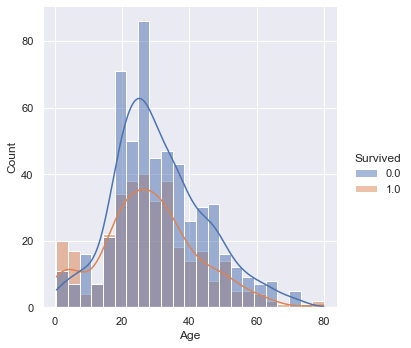

In [74]:
sns.displot(data=df_train, x="Age", hue="Survived", kde=True)

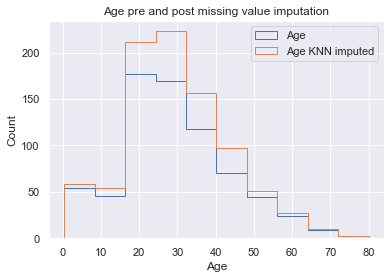

In [75]:
plt.hist(data=df, x='Age', histtype='step', label='Age')
plt.hist(data=df_train, x='Age', histtype='step', label='Age KNN imputed')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age pre and post missing value imputation')
plt.legend()


In [76]:
print('Age with missing values: ')
print(df.Age.describe())
print('')
print('Age with KNN imputation: ')
print(df_train.Age.describe())

Age with missing values: 
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Age with KNN imputation: 
count    891.000000
mean      29.951235
std       14.176038
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


With KNN imputation the shape and variance is preserved.

Final check for missing values

In [77]:
df_train.isnull().any()

Survived         False
Pclass           False
Age              False
Fare             False
FamSize          False
Sex_male         False
Embarked_Q       False
Embarked_S       False
Title_Miss       False
Title_Mr         False
Title_Mrs        False
Title_Other      False
cabin_missing    False
dtype: bool

The processed dataset, ready to build a model:

In [82]:
print('Dims: ', df_train.shape)
df_train.head(25)

Dims:  (891, 13)


,Survived,Pclass,Age,Fare,FamSize,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,cabin_missing
0,0.0,3.0,22.00000,7.2500,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,38.00000,71.2833,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3.0,26.00000,7.9250,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,35.00000,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,3.0,35.00000,8.0500,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,0.0,3.0,47.80000,8.4583,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.0,1.0,54.00000,51.8625,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7,0.0,3.0,2.00000,21.0750,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,1.0,3.0,27.00000,11.1333,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
9,1.0,2.0,14.00000,30.0708,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [79]:
df_train.to_csv("Train_prepd", index=False)